In [1]:
# import necessary library
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import networkx as nx
import osmnx as ox
import os 
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import shapely.geometry as geom
import shapely.wkt

C:\Users\mmmiah\AppData\Local\ESRI\conda\envs\geo_env\Lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_19244\457341533.py:8: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https

In [2]:
# Helper Function
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

In [3]:
# read the shprt term sites count data from 2016 to 2019
sci=pd.read_csv('H:/Desktop/Bike_ped Exposure Model Project/Processed Data/bike_unflagged_data.csv')
sci.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_19244\3955641035.py:2: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  sci=pd.read_csv('H:/Desktop/Bike_ped Exposure Model Project/Processed Data/bike_unflagged_data.csv')


,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,season,max_flag,night_flag,counts,(hour >= 6 & hour <= 21),MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day
0,1,1002,S,2017,30418,30418,243,Miovision6,2017-12-13,Wednesday,...,False,False,False,4,True,77.1648,False,False,0,False
1,2,1002,S,2017,30420,30420,245,Miovision6,2017-12-13,Wednesday,...,False,False,False,2,True,77.1648,False,False,0,False
2,3,1002,S,2017,30419,30419,244,Miovision6,2017-12-13,Wednesday,...,False,False,False,4,True,77.1648,False,False,0,False
3,4,1002,S,2017,30421,30421,246,Miovision6,2017-12-13,Wednesday,...,False,False,False,6,True,77.1648,False,False,0,False
4,5,101099,S,2018,29891,29891,787,Vista86,2018-04-19,Thursday,...,False,False,False,3,True,58.3736,False,False,0,False


In [4]:
sci['Total_hour'].describe()

count    26520.000000
mean        36.889253
std         79.686817
min          2.000000
25%          4.000000
50%          8.000000
75%         21.000000
max        353.000000
Name: Total_hour, dtype: float64

In [29]:
sci['counts'].describe()

count    26520.000000
mean         9.222210
std         11.385765
min          0.000000
25%          2.000000
50%          5.000000
75%         11.000000
max         95.000000
Name: counts, dtype: float64

In [5]:
sci.groupby(['year'])['ID'].count()

year
2014    1095
2015    2153
2016    8586
2017    4664
2018    6110
2019    3912
Name: ID, dtype: int64

In [8]:
sci.groupby(['matched_seg_id'])['diff'].count()

matched_seg_id
1002       4
1030       9
1197      11
1266      10
1388       9
          ..
163139     8
163153     8
163156     8
163158     8
163159     8
Name: diff, Length: 3178, dtype: int64

In [9]:
sci.groupby(['year'])['Leg'].count()

year
2014    1095
2015    2153
2016    8586
2017    4664
2018    6110
2019    3912
Name: Leg, dtype: int64

In [10]:
sci['Leg'].replace({None: 'unknown'},inplace =True)
sci['matched_seg_id'].replace({None: 'unknown'},inplace =True)

In [11]:
sci.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,season,max_flag,night_flag,counts,(hour >= 6 & hour <= 21),MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day
0,1,1002,S,2017,30418,30418,243,Miovision6,2017-12-13,Wednesday,...,False,False,False,4,True,77.1648,False,False,0,False
1,2,1002,S,2017,30420,30420,245,Miovision6,2017-12-13,Wednesday,...,False,False,False,2,True,77.1648,False,False,0,False
2,3,1002,S,2017,30419,30419,244,Miovision6,2017-12-13,Wednesday,...,False,False,False,4,True,77.1648,False,False,0,False
3,4,1002,S,2017,30421,30421,246,Miovision6,2017-12-13,Wednesday,...,False,False,False,6,True,77.1648,False,False,0,False
4,5,101099,S,2018,29891,29891,787,Vista86,2018-04-19,Thursday,...,False,False,False,3,True,58.3736,False,False,0,False


In [12]:
sci['Mio'] = pd.np.where(sci.ID.str.contains("NaN"),"0",
                   pd.np.where(sci.ID.str.contains("Miovision"), '1',0)) 
scc=sci.loc[sci['Mio']=='1']
scc1=scc.loc[scc['year']==2015]
scc1['ID'].nunique()


C:\Users\mmmiah\AppData\Local\Temp\ipykernel_19244\2565710617.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  sci['Mio'] = pd.np.where(sci.ID.str.contains("NaN"),"0",
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_19244\2565710617.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(sci.ID.str.contains("Miovision"), '1',0))


21

In [13]:
sci.columns

Index(['Unnamed: 0.2', 'matched_seg_id', 'Leg', 'year', '...1', 'Unnamed: 0.1',
       'Unnamed: 0', 'ID', 'Date', 'Day of Week', 'Start Time', 'End Time',
       'Count', 'date', 'month', 'day', 'dayofweek', 'weekday_Status',
       'Week Day Status', 'starttime', 'endtime', 'starttime1', 'endtime1',
       'startDateTime', 'endDateTime', 'diff', 'hour', 'Total_hour',
       'csum_counts', 'csum_hours', 'consec_flag', 'consec_flag1', 'season',
       'max_flag', 'night_flag', 'counts', '(hour >= 6 & hour <= 21)',
       'MAD_flag_threshold', 'MAD_flag', 'comb_flag', 'comb_flag_day_count',
       'comb_flag_day', 'Mio'],
      dtype='object')

In [14]:
scc1

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,max_flag,night_flag,counts,(hour >= 6 & hour <= 21),MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio
872,873,108051,W,2015,38125,38125,7950,Miovision416,2015-09-11,Friday,...,False,False,6,True,77.1648,False,False,0,False,1
873,874,108051,W,2015,38129,38129,7954,Miovision416,2015-09-11,Friday,...,False,False,1,True,77.1648,False,False,0,False,1
874,875,108051,W,2015,38130,38130,7955,Miovision416,2015-09-11,Friday,...,False,False,4,True,77.1648,False,False,0,False,1
875,876,108051,W,2015,38127,38127,7952,Miovision416,2015-09-11,Friday,...,False,False,1,True,77.1648,False,False,0,False,1
876,877,108051,W,2015,38122,38122,7947,Miovision416,2015-09-11,Friday,...,False,False,1,True,77.1648,False,False,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23469,23470,73369,N,2015,37494,37494,7319,Miovision375,2015-08-20,Thursday,...,False,False,1,True,77.1648,False,False,0,False,1
23470,23471,73421,E,2015,37481,37481,7306,Miovision374,2015-08-20,Thursday,...,False,False,1,True,77.1648,False,False,0,False,1
23471,23472,73421,E,2015,37484,37484,7309,Miovision374,2015-08-20,Thursday,...,False,False,1,True,77.1648,False,False,0,False,1
23472,23473,73421,E,2015,37483,37483,7308,Miovision374,2015-08-20,Thursday,...,False,False,1,True,77.1648,False,False,0,False,1


In [15]:
sci['matched_seg_id'].nunique()

3178

In [16]:
# dur1['matched_seg_id'].nunique(),sci['matched_seg_id'].nunique(), dur1.shape

In [17]:
check=sci.loc[sci['Count']>500]
check

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,max_flag,night_flag,counts,(hour >= 6 & hour <= 21),MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio


In [18]:
# drop all one hour data 
# cond = sci['matched_seg_id'].isin(dur1['matched_seg_id'])
# sci.drop(sci[cond].index, inplace = True)
# sci.head()

In [19]:
# save this data and run lindsey QA/QC on this data


In [20]:
# check kern location high volume and drop hourly volume grater than 100
# sci['kern'] = pd.np.where(sci.ID.str.contains("NaN"),"0",
#                    pd.np.where(sci.ID.str.contains("Kern"), '1',0)) 
# scp=sci.loc[sci['kern']=='1']
# scp1=scp.loc[scp['Count']<=100]

# scp2=sci.loc[sci['kern']=='0']
# scp2.shape, scp1.shape

In [21]:
# c=scp.loc[scp['ID']=='Kern540']
# c

In [22]:
# plt.figure(figsize=(25,20))
# sns.set(font_scale=2)
# sns.scatterplot(data=scp, x="ID", y="Count", hue="ID",legend=False)
# plt.xticks(rotation=45)

In [23]:
# now join filter data set
#sc=pd.concat([scp1,scp2],axis=0)
sc=sci
sc.shape

(26520, 43)

In [24]:
id=sc['ID'].str.contains('miov')
id.count()

26520

In [25]:
sc['matched_seg_id'].nunique()

3178

In [26]:
#now again check the sites that have only one hour counts
dur=pd.DataFrame({'dur':sc.groupby(['matched_seg_id','Leg','year'])['diff'].sum()}).reset_index()
dur1=dur.loc[dur['dur']==1]
dur1.shape

(95, 4)

In [27]:
dur['dur'].describe()

count    4351.000000
mean        6.445875
std        14.560165
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       353.000000
Name: dur, dtype: float64

In [ ]:
dur['dur'].describe()

In [49]:
c=sc.loc[sc['matched_seg_id']==66723]
c.shape

(504, 43)

In [50]:
#sc['Leg'].isnull().sum()
sc['matched_seg_id'].isnull().sum()

0

In [51]:
sc['Leg'].unique()

array(['S', 'N', 'W', 'E'], dtype=object)

In [52]:
# Winter: Dec, Jan, feb
# spring- March, April, May
#summer- June, july and August
# Autumn- Spetember, October, November

In [53]:
# check the seasonal data collection
winter_mask=sc['month'].isin([12, 1,2])
winter=sc[winter_mask]
spring_mask=sc['month'].isin([3, 4,5])
spring=sc[spring_mask]
summer_mask=sc['month'].isin([6, 7,8])
summer=sc[summer_mask]
autumn_mask=sc['month'].isin([9, 10,11])
autumn=sc[autumn_mask]
autumn.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,max_flag,night_flag,counts,(hour >= 6 & hour <= 21),MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio
23,24,101131,N,2018,29844,29844,740,Vista81,2018-11-01,Thursday,...,False,False,6,True,58.3736,False,False,0,False,0
24,25,101131,N,2018,29843,29843,739,Vista81,2018-11-01,Thursday,...,False,False,2,True,58.3736,False,False,0,False,0
65,66,102772,N,2015,29105,29105,1,Vista0,2015-09-17,Thursday,...,False,False,1,True,77.1648,False,False,0,False,0
66,67,102772,N,2015,29104,29104,0,Vista0,2015-09-17,Thursday,...,False,False,2,True,77.1648,False,False,0,False,0
115,116,102859,E,2016,29172,29172,68,Vista10,2016-09-28,Wednesday,...,False,False,4,True,95.9560,False,False,0,False,0


In [54]:
print('winter sites', winter['ID'].nunique())
print('spring sites', spring['ID'].nunique())
print('summer sites', summer['ID'].nunique())
print('autumn sites', autumn['ID'].nunique())

winter sites 482
spring sites 566
summer sites 253
autumn sites 917


In [55]:
# sites collected data in saturdaya nd sunday
sat_sun=sc.loc[sc['Week Day Status']=='Weekend']
sat_sun['ID'].nunique()

177

In [56]:
# Sites collected data from monday to friday
mon_fri=sc.loc[sc['Week Day Status']=='Week Day']
mon_fri['ID'].nunique()

1970

In [57]:
# unique number of sites
sc['ID'].nunique()


2129

In [58]:
location=pd.read_csv('H:/Desktop/Bike_ped Exposure Model Project/Processed Data/sc_stv_2014_2019.csv')
location.head()

,Unnamed: 0,ID,Leg,year,tdg_id,Lat,Long,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio
0,0,Eric_Fischer1089,N,2014.0,60313.0,34.062543,-118.309114,307766980.0,47895363.0,3905.0,865.0,3040.0,NaN,0.778489
1,1,Eric_Fischer1089,E,2014.0,60316.0,34.061703,-118.308480,307766746.0,398048051.0,4970.0,1885.0,3085.0,NaN,0.620724
2,2,Eric_Fischer1089,S,2014.0,60314.0,34.061193,-118.309105,307766737.0,398053760.0,2050.0,620.0,1430.0,NaN,0.697561
3,3,Eric_Fischer1089,W,2014.0,60320.0,34.061700,-118.309727,307766743.0,398048057.0,3560.0,1830.0,1730.0,NaN,0.485955
4,4,Eric_Fischer1086,E,2014.0,44255.0,34.090759,-118.308870,307771629.0,398048112.0,2390.0,905.0,1485.0,NaN,0.621339


In [59]:
# # bring the lat and long
# location=pd.read_csv('H:/Desktop/Bike_ped Exposure Model Project/Processed Data/SMART3_locations_20201130.csv',encoding='cp1252')
# #location['RecentYear'] = location['RecentYear'].apply(np.int64)
# location=location.rename(columns={'Study_ID':'ID'})
# location.head()

In [60]:
location1=location[['ID','tdg_id', 'Lat', 'Long']]
location1.head()

,ID,tdg_id,Lat,Long
0,Eric_Fischer1089,60313.0,34.062543,-118.309114
1,Eric_Fischer1089,60316.0,34.061703,-118.308480
2,Eric_Fischer1089,60314.0,34.061193,-118.309105
3,Eric_Fischer1089,60320.0,34.061700,-118.309727
4,Eric_Fischer1086,44255.0,34.090759,-118.308870


In [61]:
# Import additional short term location
# add_short=gpd.read_file('H:/Desktop/Bike_ped Exposure Model Project/ForMintu/ForMintu/sc_missing.shp')
# add_short=add_short.to_crs('epsg:4326')
# add_short["Long"] = add_short.centroid.x
# add_short["Lat"] =add_short.centroid.y
# add_short1=add_short[['ID','Lat', 'Long']]
# #add_short1=add_short1.rename(columns={'syear':'year'})
# add_short1.head()

In [62]:
# c=add_short1.loc[add_short1["ID"]=='Kern504']
# c

In [63]:
# Combine all short term togther
# short_all=pd.concat([location1,add_short1],axis=0)
# short_all.head()

In [64]:
short_all=location1

In [65]:
short_all['ID'].nunique(),short_all['ID'].nunique()

(2340, 2340)

In [66]:
sc['ID'].nunique(), sc.shape

(2129, (26520, 43))

In [67]:
# jpin short term counts sites data with location
sc_loc1=pd.merge(sc, short_all, left_on=['matched_seg_id'], right_on=['tdg_id'], how='inner')
sc_loc1=sc_loc1.rename(columns={'ID_x':'ID'})
sc_loc1.tail()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio,ID_y,tdg_id,Lat,Long
214154,26516,9219,E,2015,28715,28715,164,Tahoe10,2015-08-25,Tuesday,...,77.1648,False,False,0,False,0,Tahoe10,9219.0,38.922616,-120.018667
214155,26517,9219,E,2015,28719,28719,168,Tahoe10,2015-08-29,Saturday,...,77.1648,False,False,0,False,0,Tahoe10,9219.0,38.922616,-120.018667
214156,26518,9231,W,2015,28666,28666,115,Tahoe7,2015-09-21,Monday,...,77.1648,False,False,0,False,0,Tahoe7,9231.0,38.928611,-119.969014
214157,26519,9231,W,2015,28660,28660,109,Tahoe7,2015-08-29,Saturday,...,77.1648,False,False,0,False,0,Tahoe7,9231.0,38.928611,-119.969014
214158,26520,9231,W,2015,28670,28670,119,Tahoe7,2015-09-26,Saturday,...,77.1648,False,False,0,False,0,Tahoe7,9231.0,38.928611,-119.969014


In [68]:
sc_loc1['ID'].nunique()

1962

In [69]:
sc_loc1.groupby(['year'])['ID'].nunique()

year
2014    120
2015    145
2016    625
2017    379
2018    528
2019    265
Name: ID, dtype: int64

In [313]:
sc_loc=sc_loc1

#  Imput weekday Daily Volume

In [314]:
# weekend=1 and weekday=0
weekend_hr_data=sc_loc.loc[sc_loc['weekday_Status']==1]
weekday_hr_data=sc_loc.loc[sc_loc['weekday_Status']==0]
weekday_hr_data.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio,ID_y,tdg_id,Lat,Long
0,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603
1,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista88,101100.0,33.195443,-117.249603
2,9,101100,N,2018,29896,29896,792,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603
3,9,101100,N,2018,29896,29896,792,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista88,101100.0,33.195443,-117.249603
4,10,101100,N,2018,29894,29894,790,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603


In [315]:
weekday_hr_data['ID'].nunique(),weekend_hr_data['ID'].nunique()

(1833, 147)

In [316]:
# Calculate AM Count by eco id
weekday_am1=weekday_hr_data[(weekday_hr_data['starttime']=='07:00:00')]
weekday_am2=weekday_hr_data[(weekday_hr_data['starttime']=='08:00:00')]
weekday_am=pd.concat([weekday_am1,weekday_am2],axis=0)
#df181amg=df181am.groupby(['ID'])['Bicycle Count'].sum()
df181amg=pd.DataFrame({'AM_count' : weekday_am.groupby(['matched_seg_id','year','Leg'])['Count'].sum()}).reset_index()

# Calculate pM count by Eco ID
weekday_pm1=weekday_hr_data[(weekday_hr_data['starttime']=='11:00:00')]
weekday_pm2=weekday_hr_data[(weekday_hr_data['starttime']=='12:00:00')]
df181pm=pd.concat([weekday_pm1,weekday_pm2],axis=0)
#df181amg=df181am.groupby(['ID'])['Bicycle Count'].sum()
df181pmg=pd.DataFrame({'PM_count' : df181pm.groupby(['matched_seg_id','year','Leg'])['Count'].sum()}).reset_index()

# Join am and Pm count by eco id
df181_am_pm=pd.merge(df181amg,df181pmg,left_on=['matched_seg_id','year','Leg'],right_on=['matched_seg_id','year','Leg'],how='inner')
# Calculate the AMI
df181_am_pm['AMI']=df181_am_pm['AM_count']/df181_am_pm['PM_count']
df181_am_pm.head()

,matched_seg_id,year,Leg,AM_count,PM_count,AMI
0,1030,2019,E,1,5,0.200000
1,1197,2018,E,1,11,0.090909
2,1266,2018,W,1,14,0.071429
3,1388,2019,E,2,5,0.400000
4,1497,2019,N,12,22,0.545455


In [317]:
df181_am_pm['matched_seg_id'].nunique()

709

In [318]:
df181_am_pm.groupby(['year','Leg'])['matched_seg_id'].count()

year  Leg
2014  E       2
      N       2
      S       5
      W       4
2015  E       8
      N       4
      S       6
      W       6
2016  E      87
      N      87
      S      82
      W      75
2017  E      18
      N      39
      S      28
      W      17
2018  E      50
      N      43
      S      38
      W      28
2019  E      50
      N      55
      S      43
      W      48
Name: matched_seg_id, dtype: int64

In [319]:
# Calculate AM Count by eco id
df181pm1=weekday_hr_data[(weekday_hr_data['starttime']=='17:00:00')]
df181pm2=weekday_hr_data[(weekday_hr_data['starttime']=='18:00:00')]
df181pm=pd.concat([df181pm1,df181pm2],axis=0)
#df181amg=df181am.groupby(['ID'])['Bicycle Count'].sum()
df181pmg=pd.DataFrame({'late_PM_count' : df181pm.groupby(['matched_seg_id','year','Leg'])['Count'].sum()}).reset_index()

# Calculate pM count by Eco ID
df181pm2g1=weekday_hr_data[(weekday_hr_data['starttime']=='11:00:00')]
df181pm2g2=weekday_hr_data[(weekday_hr_data['starttime']=='12:00:00')]
df181pm2g=pd.concat([df181pm2g1,df181pm2g2],axis=0)
#df181amg=df181am.groupby(['ID'])['Bicycle Count'].sum()
df181pm2g=pd.DataFrame({'early_PM_count' : df181pm2g.groupby(['matched_seg_id','year','Leg'])['Count'].sum()}).reset_index()

# Join am and Pm count by eco id
df181_pm_pm=pd.merge(df181pmg,df181pm2g,left_on=['matched_seg_id','year','Leg'],right_on=['matched_seg_id','year','Leg'],how='inner')
# Calculate the AMI
df181_pm_pm['PMI']=df181_pm_pm['late_PM_count']/df181_pm_pm['early_PM_count']
df181_pm_pm.head()

,matched_seg_id,year,Leg,late_PM_count,early_PM_count,PMI
0,1030,2019,E,2,5,0.400000
1,1197,2018,E,7,11,0.636364
2,1266,2018,W,6,14,0.428571
3,1388,2019,E,11,5,2.200000
4,1497,2019,N,26,22,1.181818


In [320]:
df181_pm_pm['matched_seg_id'].nunique()

580

In [321]:
df181_pm_pm.groupby(['year','Leg'])['matched_seg_id'].count()

year  Leg
2014  E       3
      N       2
      S       5
      W       5
2015  E       8
      N       4
      S       6
      W       6
2016  E      43
      N      40
      S      32
      W      31
2017  E      28
      N      46
      S      33
      W      25
2018  E      63
      N      60
      S      51
      W      42
2019  E      51
      N      52
      S      42
      W      51
Name: matched_seg_id, dtype: int64

In [322]:
AMI_PMI=pd.merge(df181_am_pm,df181_pm_pm, left_on=['matched_seg_id','year','Leg'], right_on=['matched_seg_id','year','Leg'], how='inner')
AMI_PMI.head(10)

,matched_seg_id,year,Leg,AM_count,PM_count,AMI,late_PM_count,early_PM_count,PMI
0,1030,2019,E,1,5,0.200000,2,5,0.400000
1,1197,2018,E,1,11,0.090909,7,11,0.636364
2,1266,2018,W,1,14,0.071429,6,14,0.428571
3,1388,2019,E,2,5,0.400000,11,5,2.200000
4,1497,2019,N,12,22,0.545455,26,22,1.181818
5,1497,2019,S,2,12,0.166667,18,12,1.500000
6,1605,2019,W,2,5,0.400000,2,5,0.400000
7,2062,2019,W,2,5,0.400000,7,5,1.400000
8,2126,2018,S,16,20,0.800000,8,20,0.400000
9,5820,2019,S,8,13,0.615385,4,13,0.307692


In [323]:
AMI_PMI.shape,AMI_PMI["matched_seg_id"].nunique()

((538, 9), 462)

In [324]:
AMI_PMI['matched_seg_id'].nunique()

462

In [325]:
# mask=sc['ID'].isin(location['Study_ID'])
# sc_mis=sc[mask]
# sc_mis.shape

In [326]:
# expoort short term location with missing lat and long
# sc_m=sc[~sc.ID.isin(location.Study_ID)]
# sc_m1=sc_m.drop_duplicates(subset=['ID','Leg','year'], keep='first')
# sc_m1.columns

In [327]:
# sc_m2=sc_m1[['ID', 'year','Leg','matched_seg_id']]
# sc_m2.shape

In [328]:
# sc_m2.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/SC_with_missing_location.csv')

In [329]:
# Calculate the max AMI_PMI Value
def max_weekday_value(Max_weekday_AMI,Max_weekday_PMI):
    if Max_weekday_AMI>Max_weekday_PMI:
        return Max_weekday_AMI
    else:
        return Max_weekday_PMI

In [330]:
AMI_PMI['Max_AMI_PMI']=AMI_PMI.apply(lambda row:max_weekday_value(row['AMI'],row['PMI']),axis=1)
AMI_PMI1=AMI_PMI[['matched_seg_id','year','Leg','Max_AMI_PMI']]
AMI_PMI2=pd.merge(weekday_hr_data,AMI_PMI1,on=['matched_seg_id','year','Leg'], how='inner')
AMI_PMI2.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio,ID_y,tdg_id,Lat,Long,Max_AMI_PMI
0,115,102859,E,2016,29156,29156,52,Vista9,2016-02-02,Tuesday,...,False,False,0,False,0,Vista9,102859.0,33.201857,-117.242968,1.5
1,115,102859,E,2016,29156,29156,52,Vista9,2016-02-02,Tuesday,...,False,False,0,False,0,Vista10,102859.0,33.201857,-117.242968,1.5
2,116,102859,E,2016,29172,29172,68,Vista10,2016-09-28,Wednesday,...,False,False,0,False,0,Vista9,102859.0,33.201857,-117.242968,1.5
3,116,102859,E,2016,29172,29172,68,Vista10,2016-09-28,Wednesday,...,False,False,0,False,0,Vista10,102859.0,33.201857,-117.242968,1.5
4,117,102859,E,2016,29169,29169,65,Vista10,2016-09-28,Wednesday,...,False,False,0,False,0,Vista9,102859.0,33.201857,-117.242968,1.5


In [331]:
AMI_PMI2.shape

(15048, 48)

In [332]:
AMI_PMI2=AMI_PMI2.drop_duplicates(subset=['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long','starttime'], keep='first')

In [333]:
AMI_PMI2.shape

(6179, 48)

In [334]:
AMI_PMI.groupby(['year','Leg'])['matched_seg_id'].count()

year  Leg
2014  E       2
      N       2
      S       5
      W       4
2015  E       8
      N       3
      S       6
      W       5
2016  E      28
      N      22
      S      19
      W      18
2017  E      18
      N      37
      S      26
      W      16
2018  E      42
      N      39
      S      34
      W      24
2019  E      48
      N      48
      S      39
      W      45
Name: matched_seg_id, dtype: int64

In [335]:
AMI_PMI.groupby(['year'])['matched_seg_id'].count()

year
2014     13
2015     22
2016     87
2017     97
2018    139
2019    180
Name: matched_seg_id, dtype: int64

In [336]:
# split the data by Max_AMI_PMI Value
AMI_PMI2_g1=AMI_PMI2.loc[AMI_PMI2['Max_AMI_PMI']<=1]
AMI_PMI2_g1=AMI_PMI2_g1.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','Start Time', 'End Time', 'starttime1', 'endtime1','startDateTime',
       'endDateTime'],axis=1)
AMI_PMI2_g2=AMI_PMI2[(AMI_PMI2.Max_AMI_PMI>1) &(AMI_PMI2.Max_AMI_PMI<=2.50)]
AMI_PMI2_g3=AMI_PMI2.loc[AMI_PMI2['Max_AMI_PMI']>2.50]

In [337]:
#AMI_PMI2_g1.loc[AMI_PMI2_g1['ID']=='Kern125']

In [338]:
AMI_PMI1.shape,AMI_PMI2.shape

((538, 4), (6179, 48))

In [339]:
# read the HOD factor for weekday and group it by criteria
HOD=pd.read_csv('H:/Desktop/Bike_ped Exposure Model Project/Final Factor/Final_HOD_Factor.csv')
HOD_weekday=HOD.loc[HOD['day_of_status']=='weekday']
HOD_weekday_g1=HOD_weekday.loc[HOD_weekday['Criteria']=='Max_AMI_PMI<=1']
HOD_weekday_g2=HOD_weekday.loc[HOD_weekday['Criteria']=='1<Max_AMI_PMI<=2.5']
HOD_weekday_g3=HOD_weekday.loc[HOD_weekday['Criteria']=='Max_AMI_PMI>2.5']

In [340]:
HOD_weekday_g1.head()

,Unnamed: 0,starttime,Average_Group_HOD_Factor,Criteria,day_of_status
0,0,00:00:00,0.002970,Max_AMI_PMI<=1,weekday
1,1,01:00:00,0.002145,Max_AMI_PMI<=1,weekday
2,2,02:00:00,0.001953,Max_AMI_PMI<=1,weekday
3,3,03:00:00,0.001807,Max_AMI_PMI<=1,weekday
4,4,04:00:00,0.002084,Max_AMI_PMI<=1,weekday


In [341]:
# Calculate daily Volume for group 1
g1_DV=pd.merge(AMI_PMI2_g1,HOD_weekday_g1, on=['starttime'], how='inner')
g1_DV1=pd.DataFrame({'agge_count' : g1_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Count'].sum()}).reset_index()
g1_DV1f=pd.DataFrame({'agge_factor' : g1_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Average_Group_HOD_Factor'].sum()}).reset_index()
g1_DV1r=pd.merge(g1_DV1,g1_DV1f, on=['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'], how='inner')
g1_DV1r['Daily_Volume']=g1_DV1r['agge_count']/g1_DV1r['agge_factor']
g1_DV1rf=pd.DataFrame({'TDV' : g1_DV1r.groupby(['year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [342]:
g1_DV1.shape,g1_DV1r.shape

((208, 9), (208, 11))

In [343]:
c=g1_DV.loc[g1_DV['Count']==0]
c1=g1_DV1.loc[g1_DV1['agge_count']==0]
c.shape,c1.shape

((0, 43), (0, 9))

In [344]:
# Calculate daily Volume for group 2
g2_DV=pd.merge(AMI_PMI2_g2,HOD_weekday_g2, on=['starttime'], how='inner')
g2_DV2=pd.DataFrame({'agge_count' : g2_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Count'].sum()}).reset_index()
g2_DV2f=pd.DataFrame({'agge_factor' : g2_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Average_Group_HOD_Factor'].sum()}).reset_index()
g2_DV2r=pd.merge(g2_DV2,g2_DV2f, on=['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'], how='inner')
g2_DV2r['Daily_Volume']=g2_DV2r['agge_count']/g2_DV2r['agge_factor']
g2_DV2rf=pd.DataFrame({'TDV' : g2_DV2r.groupby(['year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [345]:
g2_DV2.shape,g2_DV2r.shape

((207, 9), (207, 11))

In [346]:
# Calculate daily Volume for group 3
g3_DV=pd.merge(AMI_PMI2_g3,HOD_weekday_g3, on=['starttime'], how='inner')
g3_DV3=pd.DataFrame({'agge_count' : g3_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Count'].sum()}).reset_index()
g3_DV3f=pd.DataFrame({'agge_factor' : g3_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Average_Group_HOD_Factor'].sum()}).reset_index()
g3_DV3r=pd.merge(g3_DV3,g3_DV3f, on=['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'], how='inner')
g3_DV3r['Daily_Volume']=g3_DV3r['agge_count']/g3_DV3r['agge_factor']
g3_DV3rf=pd.DataFrame({'TDV' : g3_DV3r.groupby(['year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [347]:
g3_DV3.shape,g3_DV3r.shape

((198, 9), (198, 11))

In [348]:
# Apply HOD factor to get Daily Total volume
# g1_DV=pd.merge(AMI_PMI2_g1,HOD_weekday_g1, on=['starttime'], how='inner')
# g1_DV['Daily_Volume']=g1_DV['Count']/g1_DV['Average_Group_HOD_Factor']
# g1_DV1=pd.DataFrame({'TDV' : g1_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()
# g2_DV=pd.merge(AMI_PMI2_g2,HOD_weekday_g2, on=['starttime'], how='inner')
# g2_DV['Daily_Volume']=g2_DV['Count']/g2_DV['Average_Group_HOD_Factor']
# g2_DV2=pd.DataFrame({'TDV' : g2_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()
# g3_DV=pd.merge(AMI_PMI2_g3,HOD_weekday_g3, on=['starttime'], how='inner')
# g3_DV['Daily_Volume']=g3_DV['Count']/g3_DV['Average_Group_HOD_Factor']
# g3_DV3=pd.DataFrame({'TDV' : g3_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()
# g3_DV3.head()

In [349]:
# combine these three group of estimated daily volume together
DV_part1=pd.concat([g1_DV1rf,g2_DV2rf,g3_DV3rf],axis=0).reset_index()
DV_part1.shape

(605, 9)

In [350]:
DV_part1.isnull().sum()

index             0
year              0
Leg               0
Day of Week       0
month             0
matched_seg_id    0
Lat               0
Long              0
TDV               0
dtype: int64

<AxesSubplot: >

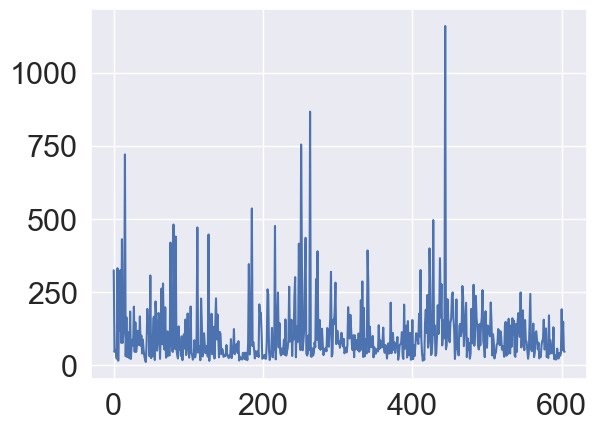

In [351]:
DV_part1['TDV'].plot()

In [352]:
DV_part1.columns

Index(['index', 'year', 'Leg', 'Day of Week', 'month', 'matched_seg_id', 'Lat',
       'Long', 'TDV'],
      dtype='object')

In [353]:
DV_part1['year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [354]:
# it seems still 1992--456= 1536 sites weekday saily volume still need to be estimated
# use Maximum Weekday AMI_PMI= 5.57710+7.58428e-05* population Density -4.76462* Strava Recreational Ratio

In [355]:
# Now find the short term sites in the weekday where Max_AMI_PMI was not able to calculate due to lack of data
common = weekday_hr_data.merge(DV_part1,on=['matched_seg_id', 'year', 'Leg'])
sc_weekday=weekday_hr_data[(~weekday_hr_data.ID.isin(common.ID))]
sc_weekday.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio,ID_y,tdg_id,Lat,Long
0,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603
1,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista88,101100.0,33.195443,-117.249603
2,9,101100,N,2018,29896,29896,792,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603
3,9,101100,N,2018,29896,29896,792,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista88,101100.0,33.195443,-117.249603
4,10,101100,N,2018,29894,29894,790,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603


In [356]:
weekday_hr_data.shape, sc_weekday.shape, DV_part1.shape

((210695, 47), (194894, 47), (605, 9))

In [357]:
weekday_hr_data['matched_seg_id'].nunique(),DV_part1['matched_seg_id'].nunique(),sc_weekday['matched_seg_id'].nunique()

(2540, 462, 2055)

In [358]:
sc_weekday.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio,ID_y,tdg_id,Lat,Long
0,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603
1,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista88,101100.0,33.195443,-117.249603
2,9,101100,N,2018,29896,29896,792,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603
3,9,101100,N,2018,29896,29896,792,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista88,101100.0,33.195443,-117.249603
4,10,101100,N,2018,29894,29894,790,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603


In [359]:
# read Strava recreation ratio data for corresponding short term sites
sc_stv=pd.read_csv('H:/Desktop/Bike_ped Exposure Model Project/Processed Data/sc_stv_2014_2019.csv')
sc_stv.head(8)

,Unnamed: 0,ID,Leg,year,tdg_id,Lat,Long,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio
0,0,Eric_Fischer1089,N,2014.0,60313.0,34.062543,-118.309114,307766980.0,47895363.0,3905.0,865.0,3040.0,NaN,0.778489
1,1,Eric_Fischer1089,E,2014.0,60316.0,34.061703,-118.308480,307766746.0,398048051.0,4970.0,1885.0,3085.0,NaN,0.620724
2,2,Eric_Fischer1089,S,2014.0,60314.0,34.061193,-118.309105,307766737.0,398053760.0,2050.0,620.0,1430.0,NaN,0.697561
3,3,Eric_Fischer1089,W,2014.0,60320.0,34.061700,-118.309727,307766743.0,398048057.0,3560.0,1830.0,1730.0,NaN,0.485955
4,4,Eric_Fischer1086,E,2014.0,44255.0,34.090759,-118.308870,307771629.0,398048112.0,2390.0,905.0,1485.0,NaN,0.621339
5,5,Eric_Fischer1086,W,2014.0,44313.0,34.090760,-118.310051,307771624.0,398048110.0,1900.0,830.0,1070.0,NaN,0.563158
6,6,Eric_Fischer1117,E,2014.0,65355.0,34.147891,-118.430403,308067403.0,405318134.0,735.0,80.0,655.0,NaN,0.891156
7,7,Eric_Fischer1117,W,2014.0,65361.0,34.148135,-118.431898,308067452.0,405318136.0,745.0,75.0,670.0,NaN,0.899329


In [360]:
# Calculate the populationden
count_sites=sc_stv
# Use Dr. Frank Code to get population density for each location of the counter within buffer
count_sites['geometry'] = gpd.points_from_xy(count_sites.Long, count_sites.Lat)
count_sites = gpd.GeoDataFrame(count_sites, geometry='geometry', crs='EPSG:4326')
# project the data for geographic analysis
count_sites = count_sites.to_crs(3310)

In [361]:
# Calculate the CBD Distance
## Try to pull whole CA state Network using polygon
# ca_poly=gpd.read_file('H:/Desktop/AT Census/OSM Bike Network/ca-state-boundary/CA_State_TIGER2016.shp',encoding='utf-8')
# ca_poly2=gpd.GeoDataFrame(ca_poly, geometry='geometry', crs='EPSG:3857')
# one_mile=1609.34
# ca_poly2['geometry'] = ca_poly2['geometry'].buffer(one_mile)
# ca_poly3=ca_poly2.to_crs("epsg:4326")
# polygon=ca_poly3.loc[0,'geometry']
# polygon

In [362]:
# Calculate the CBD distance
#https://wiki.openstreetmap.org/wiki/Tag:amenity%3Dtownhall
# Import University
# tags = {'office': 'government'}
# city_hall = ox.geometries_from_polygon(polygon, tags)
# city_proj = city_hall.to_crs(epsg=3310)

In [363]:
# Consider the rows that have city hall
# city_proj1 = city_proj[city_proj['name'].str.contains('City Hall', regex=False, case=False, na=False)]
# city_proj2 = city_proj[city_proj['name'].str.contains('Town Hall', regex=False, case=False, na=False)]
# city_proj3 = city_proj[city_proj['name'].str.contains('Civic Center', regex=False, case=False, na=False)]
# city_proj4 = city_proj[city_proj['name'].str.contains('Administration Building', regex=False, case=False, na=False)]
# city_proj5=pd.concat([city_proj1,city_proj2,city_proj3,city_proj4]).reset_index()
# city_proj5.head(2)

In [364]:
# Distance to CBD
# count_sites['CBD Distance'] = count_sites.geometry.apply(min_distance_ppoly, args=(city_proj5,))*0.000621371
# count_sites=count_sites.reset_index()
# count_sites.head(2)

In [365]:
# count_sites['CBD Distance'].isnull().sum()

In [366]:
#read Block group
block_groups_CA = gpd.read_file('H:/Desktop/Bike_ped Exposure Model Project/Block_Gp/nhgis0101_shape/nhgis0101_shape/nhgis0101_shapefile_tl2019_060_blck_grp_2019/CA_blck_grp_2019.shp')
block_groups_Ne=  gpd.read_file('H:/Desktop/Bike_ped Exposure Model Project/Block_Gp/nhgis0101_shape/nhgis0101_shape/nhgis0101_shapefile_tl2019_320_blck_grp_2019/NV_blck_grp_2019.shp')
block_groups=pd.concat([block_groups_CA,block_groups_Ne],axis=0).set_index('GEOID')
block_groups['aland_sqmi'] = block_groups['ALAND'] / (1609.*1609.)
block_groups.head(2)

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry,aland_sqmi
GEOID,,,,,,,,,,,,,,,,
060014001001,G06000104001001,06,001,400100,1,Block Group 1,G5030,S,6894339.0,0.0,+37.8676275,-122.2319460,14302.721555,6.894335e+06,"POLYGON ((-2255602.272 353149.335, -2255597.39...",2.663058
060014002001,G06000104002001,06,001,400200,1,Block Group 1,G5030,S,288069.0,0.0,+37.8497451,-122.2488478,2971.010308,2.880696e+05,"POLYGON ((-2258184.246 353217.527, -2258186.81...",0.111272


In [367]:
bg_pop = pd.read_csv('H:/Desktop/Bike_ped Exposure Model Project/Block_Gp/pop/nhgis0102_csv/nhgis0102_ds244_20195_blck_grp.csv')
bg_pop['geoid'] = bg_pop['GEOID'].str[7:]
bg_pop = bg_pop.set_index('geoid')
bg_pop = bg_pop.rename(columns={'ALUBE001': 'pop'})
bg_pop.head(2)

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,SDUNIA,PCI,PUMAA,GEOID,BTTRA,BTBGA,NAME_E,pop,NAME_M,ALUBM001
geoid,,,,,,,,,,,,,,,,,,,,,
060014001001,G06000104001001,2015-2019,CA,NaN,NaN,California,6,Alameda County,1,NaN,...,NaN,NaN,NaN,15000US060014001001,NaN,NaN,"Block Group 1, Census Tract 4001, Alameda Coun...",3120,"Block Group 1, Census Tract 4001, Alameda Coun...",208
060014002001,G06000104002001,2015-2019,CA,NaN,NaN,California,6,Alameda County,1,NaN,...,NaN,NaN,NaN,15000US060014002001,NaN,NaN,"Block Group 1, Census Tract 4002, Alameda Coun...",990,"Block Group 1, Census Tract 4002, Alameda Coun...",138


In [368]:
block_groups = block_groups.join(bg_pop[['pop']])
# calculate area-weightd average population density - make this a function if needed
count_sites = count_sites.set_index(['tdg_id', 'year'])

block_groups['popden'] = block_groups['pop']/block_groups['aland_sqmi']
block_groups = block_groups.to_crs(3310)

count_sites['buffer_geometry'] = count_sites.buffer(1609.)
count_sites = count_sites.set_geometry('buffer_geometry')

joined_geos = count_sites[['buffer_geometry']].\
    sjoin(block_groups[['geometry']]).\
    join(block_groups[['geometry']], on='index_right')

joined_geos['overlap'] = joined_geos['buffer_geometry'].intersection(joined_geos['geometry']).area

joined_geos['overlap_ratio'] = joined_geos['overlap']/(joined_geos['buffer_geometry'].area)

joined_geos = joined_geos.join(block_groups[['popden']], on='index_right')

joined_geos['weighted_popden'] = joined_geos['overlap_ratio'] * joined_geos['popden']

count_sites['popden'] = joined_geos.groupby(['tdg_id', 'year'])['weighted_popden'].sum()

In [369]:
count_sites = count_sites.set_geometry('geometry').drop(columns='buffer_geometry')

In [370]:
count_sites=count_sites.reset_index()
count_sites.head(2)

,tdg_id,year,Unnamed: 0,ID,Leg,Lat,Long,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio,geometry,popden
0,60313.0,2014.0,0,Eric_Fischer1089,N,34.062543,-118.309114,307766980.0,47895363.0,3905.0,865.0,3040.0,NaN,0.778489,POINT (156080.152 -437837.271),31855.628241
1,60316.0,2014.0,1,Eric_Fischer1089,E,34.061703,-118.308480,307766746.0,398048051.0,4970.0,1885.0,3085.0,NaN,0.620724,POINT (156140.360 -437929.311),32550.878297


In [371]:
count_sites.to_csv('H:/Desktop/Bike_ped Exposure Model Project/Estimated_Outcomes/Sc_Stv_pop_CBD.csv')

In [372]:
# separate 2019 and 2018 data as it has strava 
#count_sites1=count_sites[(count_sites['year']==2019)|(count_sites['year']==2018)]
count_sites1=count_sites.reset_index()
count_sites1['stv_rec_ratio'].fillna(0, inplace=True)
count_sites1['popden'].fillna(1, inplace=True)
count_sites1.head()

,index,tdg_id,year,Unnamed: 0,ID,Leg,Lat,Long,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio,geometry,popden
0,0,60313.0,2014.0,0,Eric_Fischer1089,N,34.062543,-118.309114,307766980.0,47895363.0,3905.0,865.0,3040.0,NaN,0.778489,POINT (156080.152 -437837.271),31855.628241
1,1,60316.0,2014.0,1,Eric_Fischer1089,E,34.061703,-118.308480,307766746.0,398048051.0,4970.0,1885.0,3085.0,NaN,0.620724,POINT (156140.360 -437929.311),32550.878297
2,2,60314.0,2014.0,2,Eric_Fischer1089,S,34.061193,-118.309105,307766737.0,398053760.0,2050.0,620.0,1430.0,NaN,0.697561,POINT (156083.639 -437986.952),31741.126338
3,3,60320.0,2014.0,3,Eric_Fischer1089,W,34.061700,-118.309727,307766743.0,398048057.0,3560.0,1830.0,1730.0,NaN,0.485955,POINT (156025.260 -437931.735),30898.086056
4,4,44255.0,2014.0,4,Eric_Fischer1086,E,34.090759,-118.308870,307771629.0,398048112.0,2390.0,905.0,1485.0,NaN,0.621339,POINT (156046.884 -434707.306),26375.825438


In [373]:
count_sites1['stv_rec_ratio'].isnull().sum()

0

In [374]:
count_sites1['ID'].nunique()

2340

# Now estimate Weekday Max AMI_PMI 


In [375]:
a=3.77571742
b= 9.29116576e-05
c= -3.10154018e+00
count_sites1['Max_AMI_PMI']=a+b*count_sites1['popden']+c*np.power(count_sites1['stv_rec_ratio'],2)
count_sites1.head(3)

,index,tdg_id,year,Unnamed: 0,ID,Leg,Lat,Long,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio,geometry,popden,Max_AMI_PMI
0,0,60313.0,2014.0,0,Eric_Fischer1089,N,34.062543,-118.309114,307766980.0,47895363.0,3905.0,865.0,3040.0,NaN,0.778489,POINT (156080.152 -437837.271),31855.628241,4.855803
1,1,60316.0,2014.0,1,Eric_Fischer1089,E,34.061703,-118.308480,307766746.0,398048051.0,4970.0,1885.0,3085.0,NaN,0.620724,POINT (156140.360 -437929.311),32550.878297,5.605054
2,2,60314.0,2014.0,2,Eric_Fischer1089,S,34.061193,-118.309105,307766737.0,398053760.0,2050.0,620.0,1430.0,NaN,0.697561,POINT (156083.639 -437986.952),31741.126338,5.215656


In [376]:
count_sites1['Max_AMI_PMI'].describe()

count    5704.000000
mean        3.828025
std         4.217390
min         0.676088
25%         1.732626
50%         2.884823
75%         4.123158
max        23.173368
Name: Max_AMI_PMI, dtype: float64

In [377]:
#count_sites2=count_sites[(count_sites['year']==2016)|(count_sites['year']==2017)]
count_sites1['popden'].fillna(1, inplace=True)

In [378]:
#count_sites1['popden'].isnull().sum(),count_sites1['CBD Distance'].isnull().sum()

In [379]:
count_sites1['tdg_id'].nunique()

3608

In [380]:
# Strava is missing for 2016 and 2017, therefore,now use Maximum Weekday AMI_PMI= -0.32406+0.03444*√("population Density" ) +𝟎.𝟎𝟒𝟐𝟖𝟑∗𝐥𝐧(𝐃𝐢𝐬𝐭𝐚𝐧𝐜𝐞 𝐭𝐨 𝐂𝐁𝐃 𝐢𝐧 𝐦𝐢𝐥𝐞) to 
#calculate max AMI_PMI for 2016 and 2017 data 
#count_sites2=count_sites[(count_sites['year']==2016)|(count_sites['year']==2017)]
# a=-0.32406
# b=0.03444
# c=0.04283
# count_sites2['Max_AMI_PMI']=a+b*np.sqrt(count_sites2['popden'])+c*np.log(count_sites2['CBD Distance'])
# count_sites2.head()

In [381]:
# count_sites1['Max_AMI_PMI'].isnull().sum(), count_sites2['Max_AMI_PMI'].isnull().sum()

In [382]:
sc_weekday.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio,ID_y,tdg_id,Lat,Long
0,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603
1,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista88,101100.0,33.195443,-117.249603
2,9,101100,N,2018,29896,29896,792,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603
3,9,101100,N,2018,29896,29896,792,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista88,101100.0,33.195443,-117.249603
4,10,101100,N,2018,29894,29894,790,Vista87,2018-04-19,Thursday,...,58.3736,False,False,0,False,0,Vista87,101100.0,33.195443,-117.249603


In [383]:
# Now combine count_sites1 and count sites 2 data
#count_sites3=pd.concat([count_sites1,count_sites2],axis=0)
count_sites4=pd.merge(sc_weekday,count_sites1,on=['tdg_id','year'], how='inner')
count_sites4.head()

,Unnamed: 0.2,matched_seg_id,Leg_x,year,...1,Unnamed: 0.1,Unnamed: 0_x,ID_x,Date,Day of Week,...,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio,geometry,popden,Max_AMI_PMI
0,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,306471736.0,436302315.0,170.0,20.0,150.0,0.117647,0.882353,POINT (256646.499 -531645.129),14860.951441,2.741779
1,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,306471736.0,436302315.0,170.0,20.0,150.0,0.117647,0.882353,POINT (256646.499 -531645.129),14860.951441,2.741779
2,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,306471736.0,436302315.0,170.0,20.0,150.0,0.117647,0.882353,POINT (256646.499 -531645.129),14860.951441,2.741779
3,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,306471736.0,436302315.0,170.0,20.0,150.0,0.117647,0.882353,POINT (256646.499 -531645.129),14860.951441,2.741779
4,9,101100,N,2018,29896,29896,792,Vista87,2018-04-19,Thursday,...,306471736.0,436302315.0,170.0,20.0,150.0,0.117647,0.882353,POINT (256646.499 -531645.129),14860.951441,2.741779


In [384]:
sc_weekday['tdg_id'].nunique(), count_sites4['tdg_id'].nunique()

(2055, 2055)

In [385]:
count_sites4=count_sites4.rename(columns={"Leg_x":'Leg'})
count_sites4=count_sites4.rename(columns={"Lat_x":'Lat'})
count_sites4=count_sites4.rename(columns={"Long_x":'Long'})

In [386]:
count_sites1['Max_AMI_PMI'].isnull().sum(), count_sites4['Max_AMI_PMI'].isnull().sum()

(0, 0)

In [387]:
sc_weekday.shape,count_sites1.shape

((194894, 47), (5704, 18))

In [388]:
sc_weekday['tdg_id'].nunique(),count_sites4['tdg_id'].nunique()

(2055, 2055)

In [389]:
# split by MAX AMI_PMI Value
m_g1=count_sites4.loc[count_sites4['Max_AMI_PMI']<=1]
m_g2=count_sites4[(count_sites4.Max_AMI_PMI>1) &(count_sites4.Max_AMI_PMI<=2.50)]
m_g3=count_sites4.loc[count_sites4['Max_AMI_PMI']>2.50]
m_g3.head(2)

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0_x,ID_x,Date,Day of Week,...,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio,geometry,popden,Max_AMI_PMI
0,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,306471736.0,436302315.0,170.0,20.0,150.0,0.117647,0.882353,POINT (256646.499 -531645.129),14860.951441,2.741779
1,8,101100,N,2018,29901,29901,797,Vista88,2018-04-19,Thursday,...,306471736.0,436302315.0,170.0,20.0,150.0,0.117647,0.882353,POINT (256646.499 -531645.129),14860.951441,2.741779


In [390]:
m_g1.shape,m_g2.shape,m_g3.shape,count_sites4.shape

((1655, 63), (13465, 63), (8762124, 63), (8777244, 63))

In [391]:
m_g3.columns

Index(['Unnamed: 0.2', 'matched_seg_id', 'Leg', 'year', '...1', 'Unnamed: 0.1',
       'Unnamed: 0_x', 'ID_x', 'Date', 'Day of Week', 'Start Time', 'End Time',
       'Count', 'date', 'month', 'day', 'dayofweek', 'weekday_Status',
       'Week Day Status', 'starttime', 'endtime', 'starttime1', 'endtime1',
       'startDateTime', 'endDateTime', 'diff', 'hour', 'Total_hour',
       'csum_counts', 'csum_hours', 'consec_flag', 'consec_flag1', 'season',
       'max_flag', 'night_flag', 'counts', '(hour >= 6 & hour <= 21)',
       'MAD_flag_threshold', 'MAD_flag', 'comb_flag', 'comb_flag_day_count',
       'comb_flag_day', 'Mio', 'ID_y', 'tdg_id', 'Lat', 'Long', 'index',
       'Unnamed: 0_y', 'ID_y', 'Leg_y', 'Lat_y', 'Long_y', 'edgeUID', 'osmId',
       'stv_total', 'stv_com_total', 'stv_rec_total', 'stv_com_ratio',
       'stv_rec_ratio', 'geometry', 'popden', 'Max_AMI_PMI'],
      dtype='object')

In [392]:
# Calculate daily Volume for group 1
mg1_DV=pd.merge(m_g1,HOD_weekday_g1, on=['starttime'], how='inner')
mg1_DV1=pd.DataFrame({'agge_count' : mg1_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Count'].sum()}).reset_index()
mg1_DV1f=pd.DataFrame({'agge_factor' : mg1_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Average_Group_HOD_Factor'].sum()}).reset_index()
mg1_DV1r=pd.merge(mg1_DV1,mg1_DV1f, on=['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'], how='inner')
mg1_DV1r['Daily_Volume']=mg1_DV1r['agge_count']/mg1_DV1r['agge_factor']
mg1_DV1rf=pd.DataFrame({'TDV' : mg1_DV1r.groupby(['year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [393]:
c=mg1_DV.loc[mg1_DV['Count']==0]
c1=mg1_DV1.loc[mg1_DV1['agge_count']==0]
c.shape,c1.shape

((0, 67), (0, 9))

In [394]:
mg1_DV1rf.isnull().sum()

year              0
Leg               0
Day of Week       0
month             0
matched_seg_id    0
Lat               0
Long              0
TDV               0
dtype: int64

In [395]:
# Calculate daily Volume for group 2
mg2_DV=pd.merge(m_g2,HOD_weekday_g2, on=['starttime'], how='inner')
mg2_DV2=pd.DataFrame({'agge_count' : mg2_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Count'].sum()}).reset_index()
mg2_DV2f=pd.DataFrame({'agge_factor' : mg2_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Average_Group_HOD_Factor'].sum()}).reset_index()
mg2_DV2r=pd.merge(mg2_DV2,mg2_DV2f, on=['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'], how='inner')
mg2_DV2r['Daily_Volume']=mg2_DV2r['agge_count']/mg2_DV2r['agge_factor']
mg2_DV2rf=pd.DataFrame({'TDV' : mg2_DV2r.groupby(['year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [396]:
c=mg2_DV.loc[mg2_DV['Count']==0]
c1=mg2_DV2.loc[mg2_DV2['agge_count']==0]
c.shape,c1.shape

((116, 67), (0, 9))

In [397]:
mg2_DV2.shape,mg2_DV2f.shape,mg2_DV2r.shape

((1153, 9), (1153, 9), (1153, 11))

In [398]:
c=mg2_DV2r.loc[mg2_DV2r['agge_count']==0]
c.shape

(0, 11)

In [399]:
mg2_DV2r.isnull().sum()

year              0
month             0
day               0
Leg               0
Day of Week       0
matched_seg_id    0
Lat               0
Long              0
agge_count        0
agge_factor       0
Daily_Volume      0
dtype: int64

In [400]:
# Calculate daily Volume for group 3
mg3_DV=pd.merge(m_g3,HOD_weekday_g3, on=['starttime'], how='inner')
mg3_DV3=pd.DataFrame({'agge_count' : mg3_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Count'].sum()}).reset_index()
mg3_DV3f=pd.DataFrame({'agge_factor' : mg3_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Average_Group_HOD_Factor'].sum()}).reset_index()
mg3_DV3r=pd.merge(mg3_DV3,mg3_DV3f, on=['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'], how='inner')
mg3_DV3r['Daily_Volume']=mg3_DV3r['agge_count']/mg3_DV3r['agge_factor']
mg3_DV3rf=pd.DataFrame({'TDV' : mg3_DV3r.groupby(['year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [401]:
c=mg3_DV.loc[mg3_DV['Count']==0]
c1=mg3_DV3.loc[mg3_DV3['agge_count']==0]
c.shape,c1.shape

((108, 67), (0, 9))

In [402]:
mg3_DV3rf.isnull().sum()

year              0
Leg               0
Day of Week       0
month             0
matched_seg_id    0
Lat               0
Long              0
TDV               0
dtype: int64

In [403]:
# Apply factor to obtain daily Volume
# mg1_DV=pd.merge(m_g1,HOD_weekday_g1, on=['starttime'], how='inner')
# mg1_DV['Daily_Volume']=mg1_DV['Count']/mg1_DV['Average_Group_HOD_Factor']
# mg1_DV1=pd.DataFrame({'TDV' : mg1_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()
# mg2_DV=pd.merge(m_g2,HOD_weekday_g2, on=['starttime'], how='inner')
# mg2_DV['Daily_Volume']=mg2_DV['Count']/mg2_DV['Average_Group_HOD_Factor']
# mg2_DV2=pd.DataFrame({'TDV' : mg2_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()
# mg3_DV=pd.merge(m_g3,HOD_weekday_g3, on=['starttime'], how='inner')
# mg3_DV['Daily_Volume']=mg3_DV['Count']/mg3_DV['Average_Group_HOD_Factor']
# mg3_DV3=pd.DataFrame({'TDV' : mg3_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()
# mg3_DV3.head()

In [404]:
mg1_DV1rf.shape, mg1_DV1r.shape

((250, 8), (250, 11))

In [405]:
# combine these three group of estimated daily volume together
DV_part2=pd.concat([mg1_DV1rf,mg2_DV2rf,mg3_DV3rf],axis=0).reset_index()
DV_part2.shape

(3193, 9)

In [406]:
DV_part2.isnull().sum()

index             0
year              0
Leg               0
Day of Week       0
month             0
matched_seg_id    0
Lat               0
Long              0
TDV               0
dtype: int64

In [407]:
DV_part2.head()

,index,year,Leg,Day of Week,month,matched_seg_id,Lat,Long,TDV
0,0,2014,E,Thursday,7,108466,35.196107,-120.700363,41.410369
1,1,2014,E,Thursday,7,108831,35.195876,-120.697624,61.792726
2,2,2014,E,Thursday,9,107843,35.045348,-120.568661,28.515399
3,3,2014,E,Thursday,9,109495,35.442174,-120.891010,86.604208
4,4,2014,E,Thursday,9,109742,35.449183,-120.905062,65.675815


<AxesSubplot: >

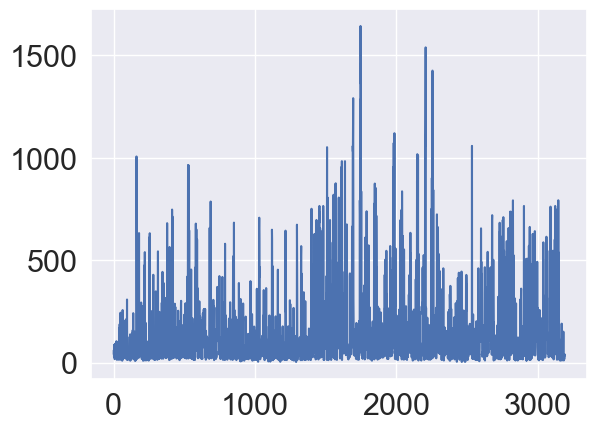

In [408]:
DV_part2['TDV'].plot()

In [409]:
# Combine all Estimated weekday Daily Volume
Weekday_DV=pd.concat([DV_part1,DV_part2],axis=0)
Weekday_DV.shape

(3798, 9)

# Now Estimate weekend Daily Volume

In [410]:
weekend_hr_data.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio,ID_y,tdg_id,Lat,Long
2763,1879,110182,S,2014,25956,25956,407,SLO_Co40,2014-09-28,Sunday,...,57.3736,False,False,0,False,0,SLO_Co40,110182.0,35.31227,-120.847924
2764,1879,110182,S,2014,25956,25956,407,SLO_Co40,2014-09-28,Sunday,...,57.3736,False,False,0,False,0,SLO_Co39,110182.0,35.31227,-120.847924
2765,1880,110182,S,2014,25958,25958,409,SLO_Co40,2014-09-28,Sunday,...,57.3736,False,False,0,False,0,SLO_Co40,110182.0,35.31227,-120.847924
2766,1880,110182,S,2014,25958,25958,409,SLO_Co40,2014-09-28,Sunday,...,57.3736,False,False,0,False,0,SLO_Co39,110182.0,35.31227,-120.847924
2767,1881,110182,S,2014,25957,25957,408,SLO_Co40,2014-09-28,Sunday,...,57.3736,False,False,0,False,0,SLO_Co40,110182.0,35.31227,-120.847924


In [411]:
weekend_hr_data['Count'].min()

0

In [412]:
count_sites=count_sites.drop(['Leg','Lat','Long'],axis=1)
count_sites.head(2)

,tdg_id,year,Unnamed: 0,ID,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio,geometry,popden
0,60313.0,2014.0,0,Eric_Fischer1089,307766980.0,47895363.0,3905.0,865.0,3040.0,NaN,0.778489,POINT (156080.152 -437837.271),31855.628241
1,60316.0,2014.0,1,Eric_Fischer1089,307766746.0,398048051.0,4970.0,1885.0,3085.0,NaN,0.620724,POINT (156140.360 -437929.311),32550.878297


In [413]:
weekend_hr_data.shape, count_sites.shape

((3464, 47), (5704, 13))

In [414]:
weekend_hr_data1=pd.merge(weekend_hr_data,count_sites,on=['tdg_id','year'], how='inner')
weekend_hr_data1.shape

(12116, 58)

In [415]:
weekend_hr_data1.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0_x,ID_x,Date,Day of Week,...,ID_y,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio,geometry,popden
0,1879,110182,S,2014,25956,25956,407,SLO_Co40,2014-09-28,Sunday,...,SLO_Co40,308301630.0,10560400.0,645.0,10.0,635.0,NaN,0.984496,POINT (-77031.423 -300167.826),2007.191301
1,1879,110182,S,2014,25956,25956,407,SLO_Co40,2014-09-28,Sunday,...,SLO_Co40,308301630.0,10560400.0,645.0,10.0,635.0,NaN,0.984496,POINT (-77031.423 -300167.826),2007.191301
2,1880,110182,S,2014,25958,25958,409,SLO_Co40,2014-09-28,Sunday,...,SLO_Co40,308301630.0,10560400.0,645.0,10.0,635.0,NaN,0.984496,POINT (-77031.423 -300167.826),2007.191301
3,1880,110182,S,2014,25958,25958,409,SLO_Co40,2014-09-28,Sunday,...,SLO_Co40,308301630.0,10560400.0,645.0,10.0,635.0,NaN,0.984496,POINT (-77031.423 -300167.826),2007.191301
4,1881,110182,S,2014,25957,25957,408,SLO_Co40,2014-09-28,Sunday,...,SLO_Co40,308301630.0,10560400.0,645.0,10.0,635.0,NaN,0.984496,POINT (-77031.423 -300167.826),2007.191301


In [416]:
weekend_hr_data1.columns

Index(['Unnamed: 0.2', 'matched_seg_id', 'Leg', 'year', '...1', 'Unnamed: 0.1',
       'Unnamed: 0_x', 'ID_x', 'Date', 'Day of Week', 'Start Time', 'End Time',
       'Count', 'date', 'month', 'day', 'dayofweek', 'weekday_Status',
       'Week Day Status', 'starttime', 'endtime', 'starttime1', 'endtime1',
       'startDateTime', 'endDateTime', 'diff', 'hour', 'Total_hour',
       'csum_counts', 'csum_hours', 'consec_flag', 'consec_flag1', 'season',
       'max_flag', 'night_flag', 'counts', '(hour >= 6 & hour <= 21)',
       'MAD_flag_threshold', 'MAD_flag', 'comb_flag', 'comb_flag_day_count',
       'comb_flag_day', 'Mio', 'ID_y', 'tdg_id', 'Lat', 'Long', 'Unnamed: 0_y',
       'ID_y', 'edgeUID', 'osmId', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'geometry',
       'popden'],
      dtype='object')

In [417]:
weekend_hr_data1['starttime'].isnull().sum()

0

In [418]:
weekend_hr_data['tdg_id'].nunique(),weekend_hr_data1['tdg_id'].nunique()

(267, 267)

In [419]:
# weekend_hr_data1=weekend_hr_data1.rename(columns={"Leg_x":'Leg'})
# weekend_hr_data1=weekend_hr_data1.rename(columns={"Lat_x":'Lat'})
# weekend_hr_data11=weekend_hr_data1.rename(columns={"Long_x":'Long'})

In [420]:
# Split the weekend data by strava recreational threshold to apply factor
w_g1=weekend_hr_data1.loc[weekend_hr_data1['stv_rec_ratio']<=0.75]
w_g2=weekend_hr_data1.loc[weekend_hr_data1['stv_rec_ratio']>0.75]
w_g2.tail(2)

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0_x,ID_x,Date,Day of Week,...,ID_y,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,stv_rec_ratio,geometry,popden
12114,26519,9231,W,2015,28660,28660,109,Tahoe7,2015-08-29,Saturday,...,Tahoe7,311396853.0,10328169.0,80.0,5.0,75.0,NaN,0.9375,POINT (2684.329 101404.529),2096.100924
12115,26520,9231,W,2015,28670,28670,119,Tahoe7,2015-09-26,Saturday,...,Tahoe7,311396853.0,10328169.0,80.0,5.0,75.0,NaN,0.9375,POINT (2684.329 101404.529),2096.100924


In [421]:
weekend_hr_data1['stv_rec_ratio'].isnull().sum()

0

In [422]:
w_g1.shape,w_g2.shape, weekend_hr_data1.shape

((793, 58), (11323, 58), (12116, 58))

In [423]:
# Split the factor by criteria
HOD_weekend=HOD.loc[HOD['day_of_status']=='weekend']
HOD_weekend_g1=HOD_weekend.loc[HOD_weekend['Criteria']=='Average_stv_rec_ratio<=0.75']
HOD_weekend_g2=HOD_weekend.loc[HOD_weekend['Criteria']=='Average_stv_rec_ratio>0.75']
HOD_weekend_g1.head()

,Unnamed: 0,starttime,Average_Group_HOD_Factor,Criteria,day_of_status
72,0,00:00:00,0.012375,Average_stv_rec_ratio<=0.75,weekend
73,1,01:00:00,0.007436,Average_stv_rec_ratio<=0.75,weekend
74,2,02:00:00,0.005741,Average_stv_rec_ratio<=0.75,weekend
75,3,03:00:00,0.004020,Average_stv_rec_ratio<=0.75,weekend
76,4,04:00:00,0.003764,Average_stv_rec_ratio<=0.75,weekend


In [424]:
weekend_hr_data1.columns

Index(['Unnamed: 0.2', 'matched_seg_id', 'Leg', 'year', '...1', 'Unnamed: 0.1',
       'Unnamed: 0_x', 'ID_x', 'Date', 'Day of Week', 'Start Time', 'End Time',
       'Count', 'date', 'month', 'day', 'dayofweek', 'weekday_Status',
       'Week Day Status', 'starttime', 'endtime', 'starttime1', 'endtime1',
       'startDateTime', 'endDateTime', 'diff', 'hour', 'Total_hour',
       'csum_counts', 'csum_hours', 'consec_flag', 'consec_flag1', 'season',
       'max_flag', 'night_flag', 'counts', '(hour >= 6 & hour <= 21)',
       'MAD_flag_threshold', 'MAD_flag', 'comb_flag', 'comb_flag_day_count',
       'comb_flag_day', 'Mio', 'ID_y', 'tdg_id', 'Lat', 'Long', 'Unnamed: 0_y',
       'ID_y', 'edgeUID', 'osmId', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'geometry',
       'popden'],
      dtype='object')

In [425]:
# Calculate daily Volume for group 1
wg1_DV=pd.merge(w_g1,HOD_weekend_g1, on=['starttime'], how='inner')
wg1_DV1=pd.DataFrame({'agge_count' : wg1_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Count'].sum()}).reset_index()
wg1_DV1f=pd.DataFrame({'agge_factor' : wg1_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Average_Group_HOD_Factor'].sum()}).reset_index()
wg1_DV1r=pd.merge(wg1_DV1,wg1_DV1f, on=['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'], how='inner')
wg1_DV1r['Daily_Volume']=wg1_DV1r['agge_count']/wg1_DV1r['agge_factor']
wg1_DV1rf=pd.DataFrame({'TDV' : wg1_DV1r.groupby(['year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [426]:
c=wg1_DV.loc[wg1_DV['Count']==0]
c1=wg1_DV1.loc[wg1_DV1['agge_count']==0]
c.shape,c1.shape

((1, 62), (0, 9))

In [427]:
# Calculate daily Volume for group 1
wg2_DV=pd.merge(w_g2,HOD_weekend_g2, on=['starttime'], how='inner')
wg2_DV2=pd.DataFrame({'agge_count' : wg2_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Count'].sum()}).reset_index()
wg2_DV2f=pd.DataFrame({'agge_factor' : wg2_DV.groupby(['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'])['Average_Group_HOD_Factor'].sum()}).reset_index()
wg2_DV2r=pd.merge(wg2_DV2,wg2_DV2f, on=['year','month','day','Leg','Day of Week','matched_seg_id','Lat','Long'], how='inner')
wg2_DV2r['Daily_Volume']=wg2_DV2r['agge_count']/wg2_DV2r['agge_factor']
wg2_DV2rf=pd.DataFrame({'TDV' : wg2_DV2r.groupby(['year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [428]:
c=wg2_DV.loc[wg2_DV['Count']==0]
c1=wg2_DV2.loc[wg2_DV2['agge_count']==0]
c.shape,c1.shape

((0, 62), (0, 9))

In [429]:
# Apply factor to obtain daily Volume
# wg1_DV=pd.merge(w_g1,HOD_weekend_g1, on=['starttime'], how='inner')
# wg1_DV['Daily_Volume']=wg1_DV['Count']/wg1_DV['Average_Group_HOD_Factor']
# wg1_DV1=pd.DataFrame({'TDV' : wg1_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()
# wg2_DV=pd.merge(w_g2,HOD_weekend_g2, on=['starttime'], how='inner')
# wg2_DV['Daily_Volume']=wg2_DV['Count']/wg2_DV['Average_Group_HOD_Factor']
# wg2_DV2=pd.DataFrame({'TDV' : wg2_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [430]:
# combine these three group of estimated daily volume together
Weekend_DV_part1=pd.concat([wg1_DV1rf,wg2_DV2rf],axis=0).reset_index()
Weekend_DV_part1.shape

(324, 9)

In [431]:
 weekend_hr_data1.columns

Index(['Unnamed: 0.2', 'matched_seg_id', 'Leg', 'year', '...1', 'Unnamed: 0.1',
       'Unnamed: 0_x', 'ID_x', 'Date', 'Day of Week', 'Start Time', 'End Time',
       'Count', 'date', 'month', 'day', 'dayofweek', 'weekday_Status',
       'Week Day Status', 'starttime', 'endtime', 'starttime1', 'endtime1',
       'startDateTime', 'endDateTime', 'diff', 'hour', 'Total_hour',
       'csum_counts', 'csum_hours', 'consec_flag', 'consec_flag1', 'season',
       'max_flag', 'night_flag', 'counts', '(hour >= 6 & hour <= 21)',
       'MAD_flag_threshold', 'MAD_flag', 'comb_flag', 'comb_flag_day_count',
       'comb_flag_day', 'Mio', 'ID_y', 'tdg_id', 'Lat', 'Long', 'Unnamed: 0_y',
       'ID_y', 'edgeUID', 'osmId', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'geometry',
       'popden'],
      dtype='object')

In [432]:
Weekend_DV_part1.columns

Index(['index', 'year', 'Leg', 'Day of Week', 'month', 'matched_seg_id', 'Lat',
       'Long', 'TDV'],
      dtype='object')

In [433]:
# Now find the short term sites in the weekend where strava recreation data was not available to calculate due to lack of data
common = weekend_hr_data1.merge(Weekend_DV_part1,on=['matched_seg_id', 'year', 'Leg'])
weekend_hr_data2=weekend_hr_data1[(~weekend_hr_data1.matched_seg_id.isin(common.matched_seg_id))]
weekend_hr_data2=weekend_hr_data2.drop(['stv_rec_ratio'],axis=1)
weekend_hr_data2.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0_x,ID_x,Date,Day of Week,...,Unnamed: 0_y,ID_y,edgeUID,osmId,stv_total,stv_com_total,stv_rec_total,stv_com_ratio,geometry,popden


In [434]:
# Now estimate Strava recreation Ratio using the formula Strava Recreational Ratio (SRR)= 0.96967-0.00303*√("population Density" ) +𝟎.𝟎𝟐𝟑𝟗𝟓∗𝐥𝐧(𝐃𝐢𝐬𝐭𝐚𝐧𝐜𝐞 𝐭𝐨 𝐂𝐁𝐃 𝐢𝐧 𝐦𝐢𝐥𝐞)
# a=0.96967
# b=-0.00303
# c=0.02395
# weekend_hr_data2['stv_rec_ratio']=a+b*np.sqrt(weekend_hr_data2['popden'])+c*np.log(weekend_hr_data2['CBD Distance'])
# weekend_hr_data2.head()

In [435]:
#weekend_hr_data2['stv_rec_ratio'].describe()

In [436]:
# Split the weekend data by strava recreational threshold to apply factor
# w_g11=weekend_hr_data2.loc[weekend_hr_data2['stv_rec_ratio']<=0.75]
# w_g22=weekend_hr_data2.loc[weekend_hr_data2['stv_rec_ratio']>0.75]
# w_g22.tail(2)

In [437]:
# Apply factor to obtain daily Volume
# wg11_DV=pd.merge(w_g11,HOD_weekend_g1, on=['starttime'], how='inner')
# wg11_DV['Daily_Volume']=wg11_DV['Count']/wg11_DV['Average_Group_HOD_Factor']
# wg11_DV11=pd.DataFrame({'TDV' : wg11_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()
# wg22_DV=pd.merge(w_g22,HOD_weekend_g2, on=['starttime'], how='inner')
# wg22_DV['Daily_Volume']=wg22_DV['Count']/wg22_DV['Average_Group_HOD_Factor']
# wg22_DV22=pd.DataFrame({'TDV' : wg22_DV.groupby(['ID','year','Leg','Day of Week','month','matched_seg_id','Lat','Long'])['Daily_Volume'].mean()}).reset_index()

In [438]:
# combine these three group of estimated daily volume together
# Weekend_DV_part2=pd.concat([wg11_DV11,wg22_DV22],axis=0).reset_index()
# Weekend_DV_part2.shape

In [439]:
# combine weekend total estimated daily volume data
Weekend_DV=Weekend_DV_part1

<AxesSubplot: >

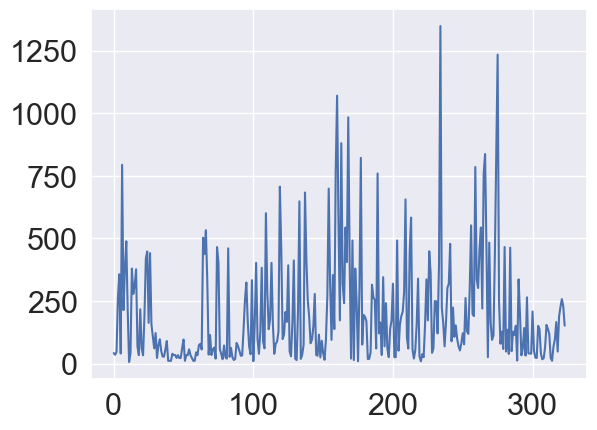

In [440]:
Weekend_DV['TDV'].plot()

In [441]:
Weekend_DV['matched_seg_id'].nunique()

267

# Combine weekday and weekend Estimated Daily Volume

In [442]:
ES_DV=pd.concat([Weekday_DV, Weekend_DV],axis=0).reset_index()
#ES_DV=ES_DV.drop_duplicates(subset=['ID','year','Leg','matched_seg_id','Lat','Long'], keep='first')
ES_DV.head()

,level_0,index,year,Leg,Day of Week,month,matched_seg_id,Lat,Long,TDV
0,0,0,2014,E,Thursday,5,6191,37.916293,-122.026658,323.429092
1,1,1,2014,N,Thursday,5,6274,37.919106,-122.065131,44.209732
2,2,2,2014,S,Thursday,5,6002,37.916497,-122.027719,51.190216
3,3,3,2014,S,Thursday,5,6127,37.917992,-122.065518,44.209732
4,4,4,2014,S,Thursday,5,6192,37.884941,-122.077718,20.941452


In [443]:
zero=ES_DV.loc[ES_DV['TDV']==0]
zero.shape

(0, 10)

In [444]:
ES_DV['matched_seg_id'].nunique(),zero['matched_seg_id'].nunique()

(2605, 0)

In [445]:
ES_DV.groupby(['year'])['matched_seg_id'].count()

year
2014     261
2015     399
2016    1464
2017     493
2018    1134
2019     371
Name: matched_seg_id, dtype: int64

In [446]:
ES_DV.groupby(['year'])['matched_seg_id'].nunique()

year
2014     227
2015     320
2016    1218
2017     472
2018     939
2019     297
Name: matched_seg_id, dtype: int64

<AxesSubplot: >

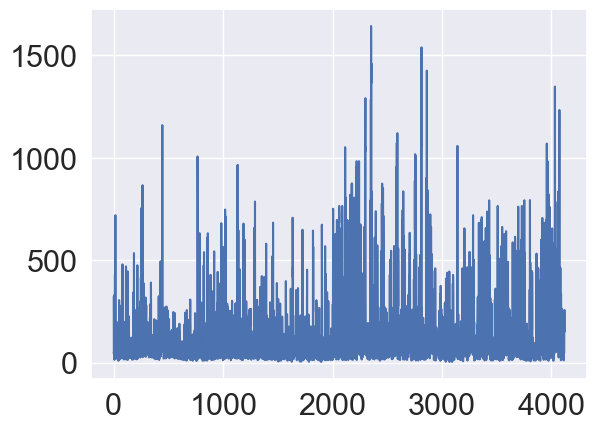

In [447]:
ES_DV['TDV'].plot()

In [448]:
ES_DV.isnull().sum()

level_0           0
index             0
year              0
Leg               0
Day of Week       0
month             0
matched_seg_id    0
Lat               0
Long              0
TDV               0
dtype: int64

In [449]:
anomally=ES_DV.loc[ES_DV['TDV']>4000]
anomally

,level_0,index,year,Leg,Day of Week,month,matched_seg_id,Lat,Long,TDV


In [450]:
an1=sc.loc[sc['ID']=='Miovision81']
an1.head()

,Unnamed: 0.2,matched_seg_id,Leg,year,...1,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,...,max_flag,night_flag,counts,(hour >= 6 & hour <= 21),MAD_flag_threshold,MAD_flag,comb_flag,comb_flag_day_count,comb_flag_day,Mio
23313,23314,7175,N,2017,32675,32675,2500,Miovision81,2017-06-04,Sunday,...,False,False,16,True,77.1648,False,False,0,False,1
23314,23315,7175,N,2017,32673,32673,2498,Miovision81,2017-06-04,Sunday,...,False,False,28,True,77.1648,False,False,0,False,1
23315,23316,7175,N,2017,32674,32674,2499,Miovision81,2017-06-04,Sunday,...,False,False,17,True,77.1648,False,False,0,False,1
23333,23334,7175,N,2017,32679,32679,2504,Miovision81,2017-06-04,Sunday,...,False,False,10,True,77.1648,False,False,0,False,1
23335,23336,7175,N,2017,32681,32681,2506,Miovision81,2017-06-04,Sunday,...,False,False,6,True,77.1648,False,False,0,False,1


In [451]:
ES_DV.to_csv('H:/Desktop/Bike_ped Exposure Model Project/Estimated_Outcomes/Revised_Estimated_SC_DV_feb19.csv',index=False)

# End of the Code